In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.datasets import fashion_mnist
import matplotlib.pyplot as plt

# Load the data
(x_train,y_train), (x_test,y_test) = fashion_mnist.load_data()
# Reshape the data into a 4D tensor
x_train = x_train.reshape(60000,28,28,1) 
x_train = x_train / 255.0
x_test = x_test.reshape(10000,28,28,1) 
x_test = x_test / 255.0

# Implementing Callback
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs = {}):
        if (logs.get("loss")<0.02):
            print("\nStopping training because accuracy has reached 90%")
            self.model.stop_training = True
callbacks = myCallback()

# Create the Neural Network model
network = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation = "relu", input_shape = (28,28,1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation = "relu"),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation = "relu"),
    tf.keras.layers.Dense(10, activation = "softmax")
])

# Compile the model
network.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])
# Train the model
history = network.fit(x_train, y_train, epochs = 10, callbacks = [callbacks])
# Test the model
test_loss, test_accuracy = network.evaluate(x_test, y_test)
# Compare metrics
print(f"Test Accuracy is : {test_accuracy}")

Using TensorFlow backend.


4423680/4422102 [==============================] - 1s 0us/step
Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4731 - accuracy: 0.8279
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3192 - accuracy: 0.8827
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2744 - accuracy: 0.8991
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2427 - accuracy: 0.9101
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2227 - accuracy: 0.9173
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1986 - accuracy: 0.9263
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1817 - accuracy: 0.9312
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1662 - accuracy: 0.9373
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1513 - accuracy: 0.9427
Epoch 10/10
313/313

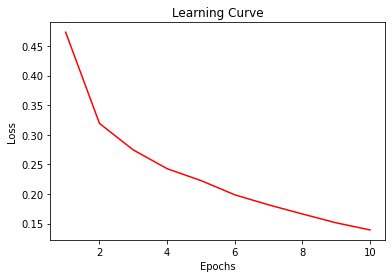

In [3]:
# Plot the learning curve
history_dict = history.history
Training_Loss = history_dict["loss"]
epochs = range(1,11)
plt.plot(epochs, Training_Loss, "r")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Learning Curve")
plt.show()